Intro

Goals and summary

Acquire telco data from the MYSQL database

build and use predefined function to Acquire and prep the data
use SQL queries to join and read it into a dataframe
examine the data for missing and null values
clean the data and decide of the variables that needs to be encoded


In [1]:
import acquire as aqr
import prepare as prep
#import explore
#import model_functions as model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
telco_df = aqr.get_telco_data()


In [3]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
prep.telco_raw_summary(telco_df)

COLUMNS NAMES OF TELCO DATASET

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

THE SHAPE OF TELCO DATASET

The Telco dataset has 7043 rows and 24 columns

TELCO INFO AND DATA TYPES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64

In [5]:
#telco churn distribution

In [6]:
df = prep.prep_telco()

In [7]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [8]:
train, validate, test = prep.split_telco(df)

In [9]:
train.shape

(3943, 33)

In [10]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
5642,1982-FEBTD,Female,0,1,1,23,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3338,8982-NHAVY,Male,0,0,0,27,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4273,4115-NZRKS,Female,1,0,0,7,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2382,9633-DENPU,Female,0,1,0,47,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
2655,5693-PIPCS,Male,0,0,0,41,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3943 non-null   object 
 1   gender             3943 non-null   object 
 2   senior_citizen     3943 non-null   int64  
 3   partner            3943 non-null   int64  
 4   dependents         3943 non-null   int64  
 5   tenure             3943 non-null   int64  
 6   phone_service      3943 non-null   int64  
 7   multiple_lines     3943 non-null   int64  
 8   online_security    3943 non-null   int64  
 9   online_backup      3943 non-null   int64  
 10  device_protection  3943 non-null   int64  
 11  tech_support       3943 non-null   int64  
 12  streaming_tv       3943 non-null   int64  
 13  streaming_movies   3943 non-null   int64  
 14  paperless_billing  3943 non-null   int64  
 15  monthly_charges    3943 non-null   float64
 16  total_charges      39

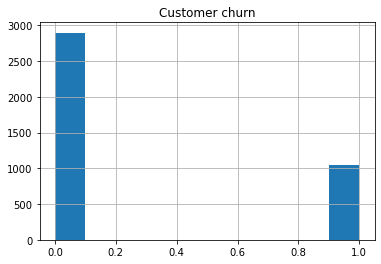

In [12]:
plt.title("Customer churn")
train.churn.hist()
plt.show()

In [13]:
churn = train['churn'].value_counts().to_frame().reset_index()
churn.columns = ['Churn', 'Frequency']
churn

,Churn,Frequency
0,0,2897
1,1,1046


In [14]:
print("Percent churn")
round(train.churn.mean(), 3)

Percent churn


0.265

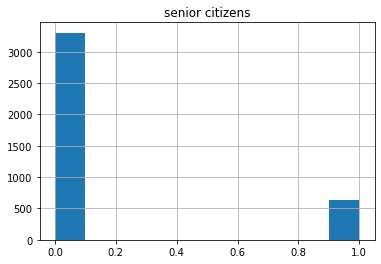

In [15]:
plt.title("senior citizens")
train.senior_citizen.hist()
plt.show()

In [16]:
print("Percent sesior citizen")
round(train.senior_citizen.mean(), 3)

Percent sesior citizen


0.162

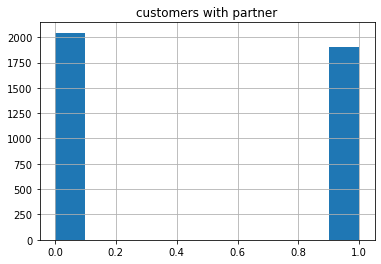

In [17]:
plt.title("customers with partner")
train.partner.hist()
plt.show()

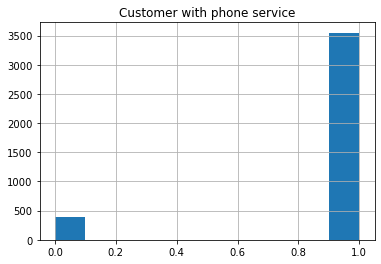

In [18]:
plt.title("Customer with phone service")
train.phone_service.hist()
plt.show()

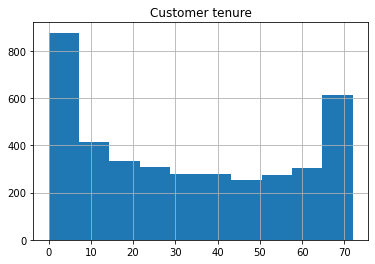

In [19]:
plt.title("Customer tenure")
train.tenure.hist()
plt.show()

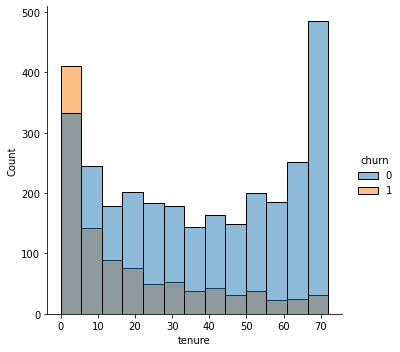

In [20]:
sns.displot(data=train, x='tenure', hue='churn')

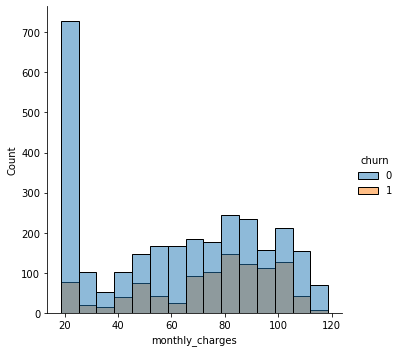

In [21]:
sns.displot(data=train, x='monthly_charges', hue='churn')

Do churned and non churned customers pay the same monthly charges?

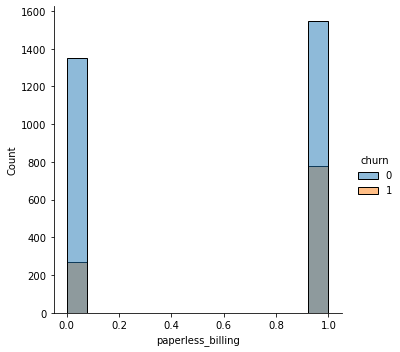

In [22]:
sns.displot(data=train, x= 'paperless_billing', hue='churn')

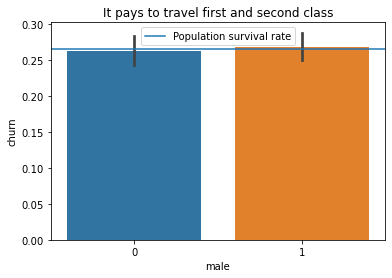

In [23]:
plt.title("It pays to travel first and second class")
sns.barplot(x="male", y="churn", data=train)
population_survival_rate = train.churn.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [24]:
# is there any difference between gender?
# No differences between male and females

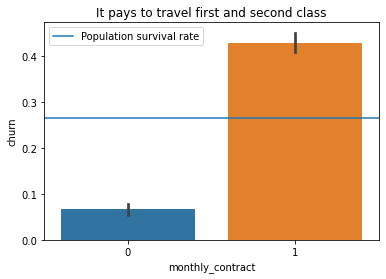

In [25]:
plt.title("It pays to travel first and second class")
sns.barplot(x="monthly_contract", y="churn", data=train)
population_survival_rate = train.churn.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

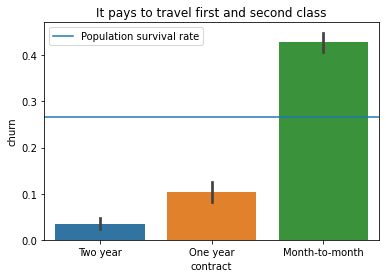

In [26]:
plt.title("It pays to travel first and second class")
sns.barplot(x="contract", y="churn", data=train)
population_survival_rate = train.churn.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [27]:
# Which contract type are churning the most ?
#Monthly customers are the churning the most 

In [28]:
# ttest


In [29]:
alpha = .05
churn_sample = train[train.churn== 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

12.411208836102778 2.1483628461896314e-33 0.05


h0 : There is no difference between average monthly charges for churned customers and all customers 
ha : There is a difference between monthly average charges for churned customers and all customers

In [30]:
if p < alpha :
    print('We reject our null hypothesis')
else:
    print("We fail to reject our null hypothesis")

We reject our null hypothesis


In [31]:
# Document findngs 

In [32]:
train[train.churn == 1].monthly_charges.mean()

74.5801147227533

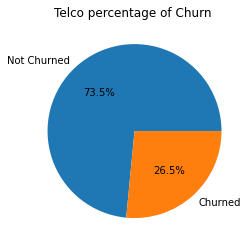

In [33]:
prep.viz_churn(train)

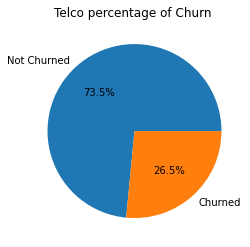

In [40]:
prep.viz_churn(telco_df)

In [34]:
train.monthly_charges.mean()

65.10278975399429

In [35]:
from scipy.stats import f_oneway

In [36]:
# Let's isolate out the tips by day
monthly = train[train.contract == "Month-to-month"].monthly_charges
two_year = train[train.contract == "Two year"].monthly_charges
one_year = train[train.contract == "One year contract"].monthly_charges


In [37]:
f, p = f_oneway(monthly, two_year, two_year)
p

1.0298869411568917e-06

In [38]:
null_hypothesis = "Average Tip amounts are the same across days of the week"
alternative_hypothesis = "Average tips are different on different days of the week"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [39]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that tip averages are significantly different across days of the week.")


We reject the null hypothesis that Average Tip amounts are the same across days of the week
We move forward with the alternative hypothesis that Average tips are different on different days of the week
